# <center><span style="font-size:100px ; color:red">Projet 09:</span> </center>

#  <center><span style="font-size:50px ; color:"> Produisez une étude de marché avec <span style="font-size:50px ; color:red">R</span> ou <span style="font-size:50px ; color:red">Python</span></center>

####  <span style="font-size:40px ; color:blue">Partie 1:</span> <span style="font-size:30px"> Préparation, nettoyage et analyse exploratoire</span>

## Sommaire:
1. [Importation des  librairies](#1.-Importation-des-librairies)  
2. [Importations et nettoyage des fichiers](#2.-Importations-et-nettoyage-des-fichiers)  
    2.1. [Disponibilité alimentaire](#2.1.-Disponibilité-alimentaire)  
    2.2. [Population 2000<2018](#2.2.-Population-2000<2018)  
    2.3. [Revenus](#2.3.-Revenus)  
    2.4. [Produits Intérieur Brut](#2.4.-Produits-Intérieur-Brut)  
    2.5. [Stabilité politique](#2.5.-Stabilité-politique)  
    2.6. [Taux total d'impôts et de cotisations](#2.6.-Taux-total-d'impôts-et-de-cotisations)  
    2.7. [Investissements étrangers directs (IED)](#2.7.-Investissements-étrangers-directs)  
    2.8. [Dépenses liées au tourisme international](#2.8.-Dépenses-liées-au-tourisme-international)  
    2.9. [Inflation, prix à la consommation](#2.9.-Inflation,-prix-à-la-consommation)  
    2.10. [Formation brute de capital fixe](#2.10.-Formation-brute-de-capital-fixe)  
    2.11. [Indice de profondeur de l'information sur le crédit (DCII)](#2.11.-Indice-de-profondeur-de-l'information-sur-le-crédit)     
3. [Jointures des fichiers](#3.-Jointures)  

# 1. Importation des librairies
#### [Retour](#Sommaire:)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 2. Importations et nettoyage des fichiers

## 2.1. Disponibilité alimentaire
#### [Retour](#Sommaire:)

In [2]:
# 1.Chargement des données
df_dispo_alimentaire = pd.read_csv('data/DisponibiliteAlimentaire_2017.csv')
df_dispo_alimentaire.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
# 2.Sélection des colonnes
df_dispo_alimentaire = df_dispo_alimentaire.drop(columns=["Code Domaine", "Domaine", "Code zone", 
                                 "Code Élément", "Code Produit", "Code année",
                                "Unité", "Symbole", "Description du Symbole", "Année"])
print(df_dispo_alimentaire.shape)
df_dispo_alimentaire

(176600, 4)


,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00
...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,0.04


In [4]:
# 3. Détéction et affichage des valeurs de la colonne Produit
print(df_dispo_alimentaire['Produit'].unique())

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [5]:
# 4. Selection de disponibilité pour produits 'Viande de Volailles'
df_dispo_alimentaire = df_dispo_alimentaire[df_dispo_alimentaire['Produit']=='Viande de Volailles']
df_dispo_alimentaire.head(5)

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [6]:
# 6.On pivote la table pour avoir les valeurs en lignes 
df_dispo_alimentaire = pd.pivot_table(df_dispo_alimentaire, values='Valeur', index=['Zone'],
                    columns=['Élément']).reset_index()
df_dispo_alimentaire

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [7]:
# 7. Affichage des colonnes utiles pour l'étude
df_dispo_alimentaire = df_dispo_alimentaire.drop(columns=['Alimentation pour touristes','Résidus','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Semences','Traitement'])
df_dispo_alimentaire

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock
0,Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0
2,Albanie,47.0,0.0,38.0,47.0,NaN,13.0,4.0
3,Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0
4,Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,412.0,94.0,433.0,412.0,NaN,48.0,-26.0
168,Équateur,341.0,0.0,0.0,324.0,17.0,340.0,-1.0
169,États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,NaN,21914.0,80.0
170,Éthiopie,14.0,NaN,1.0,14.0,1.0,14.0,0.0


In [8]:
# 8. Affichage des informations de base des colonnes
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      172 non-null    object 
 1   Disponibilité intérieure  170 non-null    float64
 2   Exportations - Quantité   135 non-null    float64
 3   Importations - Quantité   170 non-null    float64
 4   Nourriture                170 non-null    float64
 5   Pertes                    67 non-null     float64
 6   Production                168 non-null    float64
 7   Variation de stock        169 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.9+ KB


In [9]:
# 9. Déscription des données
df_dispo_alimentaire[['Disponibilité intérieure','Exportations - Quantité',
                      'Importations - Quantité','Nourriture','Pertes','Production','Variation de stock']].describe()

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock
count,170.000000,135.000000,170.000000,170.000000,67.000000,168.000000,169.000000
mean,687.594118,132.185185,89.529412,657.047059,43.582090,725.190476,13.668639
std,2187.184747,513.784440,186.669983,2136.545796,120.818816,2501.457125,75.364884
min,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-119.000000
25%,30.500000,0.000000,3.000000,28.500000,1.000000,13.750000,0.000000
50%,100.000000,3.000000,16.000000,99.500000,4.000000,70.000000,0.000000
75%,368.250000,32.000000,81.250000,365.250000,29.500000,409.750000,7.000000
max,18266.000000,4223.000000,1069.000000,18100.000000,695.000000,21914.000000,859.000000


In [10]:
# 10. Détection  des doublons
df_dispo_alimentaire.duplicated().sum()

0

In [11]:
# 11. Recherche des valeurs nulles
df_dispo_alimentaire.isnull().sum()

Élément
Zone                          0
Disponibilité intérieure      2
Exportations - Quantité      37
Importations - Quantité       2
Nourriture                    2
Pertes                      105
Production                    4
Variation de stock            3
dtype: int64

In [12]:
# 12. Conversion des types de variables
df_dispo_alimentaire['Disponibilité intérieure'] = df_dispo_alimentaire['Disponibilité intérieure'].astype(float)
df_dispo_alimentaire['Exportations - Quantité'] = df_dispo_alimentaire['Exportations - Quantité'].astype(float)
df_dispo_alimentaire['Importations - Quantité'] = df_dispo_alimentaire['Importations - Quantité'].astype(float)
df_dispo_alimentaire['Nourriture'] = df_dispo_alimentaire['Nourriture'].astype(float)
df_dispo_alimentaire['Pertes'] = df_dispo_alimentaire['Pertes'].astype(float)
df_dispo_alimentaire['Production'] = df_dispo_alimentaire['Production'].astype(float)
df_dispo_alimentaire['Variation de stock'] = df_dispo_alimentaire['Variation de stock'].astype(float)
df_dispo_alimentaire

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock
0,Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0
2,Albanie,47.0,0.0,38.0,47.0,NaN,13.0,4.0
3,Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0
4,Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,412.0,94.0,433.0,412.0,NaN,48.0,-26.0
168,Équateur,341.0,0.0,0.0,324.0,17.0,340.0,-1.0
169,États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,NaN,21914.0,80.0
170,Éthiopie,14.0,NaN,1.0,14.0,1.0,14.0,0.0


In [13]:
# 13. Affichage des types des variables
df_dispo_alimentaire.dtypes

Élément
Zone                         object
Disponibilité intérieure    float64
Exportations - Quantité     float64
Importations - Quantité     float64
Nourriture                  float64
Pertes                      float64
Production                  float64
Variation de stock          float64
dtype: object

In [14]:
# 13.Ajout d'une colonne Taux de dépendance des importations (TDI)
df_dispo_alimentaire['TDI'] = df_dispo_alimentaire['Importations - Quantité'] / df_dispo_alimentaire['Disponibilité intérieure'] * 100

In [15]:
df_dispo_alimentaire = df_dispo_alimentaire.rename(columns={'Zone':'Pays',}) 
df_dispo_alimentaire

Élément,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI
0,Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0,50.877193
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,24.268178
2,Albanie,47.0,0.0,38.0,47.0,NaN,13.0,4.0,80.851064
3,Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.722022
4,Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0,48.418631
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,412.0,94.0,433.0,412.0,NaN,48.0,-26.0,105.097087
168,Équateur,341.0,0.0,0.0,324.0,17.0,340.0,-1.0,0.000000
169,États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,NaN,21914.0,80.0,0.673382
170,Éthiopie,14.0,NaN,1.0,14.0,1.0,14.0,0.0,7.142857


In [16]:
# 14.Changement des noms des colonnes
df_dispo_alimentaire = df_dispo_alimentaire.rename(columns={'Zone':'Pays'})
df_dispo_alimentaire['Pays'] = df_dispo_alimentaire['Pays'].replace('Chine - RAS de Hong-Kong', 'Chine, RAS de Hong-Kong')
df_dispo_alimentaire['Pays'] = df_dispo_alimentaire['Pays'].replace('Chine - RAS de Macao', 'Chine, RAS de Macao')
df_dispo_alimentaire[df_dispo_alimentaire['Pays']=='Chine, continentale']

Élément,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI
34,"Chine, continentale",18161.0,576.0,452.0,17518.0,643.0,18236.0,-50.0,2.48885


## 2.2. Population 2000<2018
#### [Retour](#Sommaire:)

In [17]:
# 1. Chargement des données
Population = pd.read_csv('data/Population_2000_2018.csv')
Population.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [18]:
# 2. Selection des colonnes
Population = Population.drop(columns=["Code Domaine", "Domaine", "Code zone", 
                                      "Code Élément", "Élément", "Code Produit", "Produit", "Code année",
                                      "Unité", "Symbole", "Description du Symbole", "Note"])
print(Population.shape) # On affiche le nombre de lignes et de colonnes dans le dataframe
Population.head(5)

(4411, 3)


,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684


In [19]:
# 3.Sélection des données à l'année 2017
Population17 = Population[Population['Année'] == 2017]
Population17

,Zone,Année,Valeur
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


In [20]:
# 4. Information de base
Population17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    236 non-null    object 
 1   Année   236 non-null    int64  
 2   Valeur  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [21]:
# 5. Détection des valeurs nulles
Population17.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [22]:
# 6.Changement des noms des colonnes
Population17 = Population17.rename(columns={'Zone':'Pays','Valeur':'Population'})
Population17.head(5)

,Pays,Année,Population
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409


In [23]:
# Création de la dataframe d'évolution pendant 10 Ans: popu_evo avec le nouvelle variable
# Changer le type des données
Population = Population.astype({'Année':str})
# Sélection des données de l'année 2017 et 2007
popu_1= Population.loc[Population['Année'].isin(['2007','2017'])].reset_index(drop=True)
popu_1.head()

,Zone,Année,Valeur
0,Afghanistan,2007,27100.536
1,Afghanistan,2017,36296.113
2,Afrique du Sud,2007,49119.759
3,Afrique du Sud,2017,57009.756
4,Albanie,2007,3033.998


In [24]:
# Changement des noms des colonnes
popu_1 = popu_1.rename(columns={'Zone':'Pays'})
popu_1.head(5)

,Pays,Année,Valeur
0,Afghanistan,2007,27100.536
1,Afghanistan,2017,36296.113
2,Afrique du Sud,2007,49119.759
3,Afrique du Sud,2017,57009.756
4,Albanie,2007,3033.998


In [25]:
# Condition booléenne pour le remplacement des valeurs
#condition = (popu_1['Pays'] == 'Chine - RAS de Hong-Kong') | (popu_1['Pays'] == 'Chine - RAS de Macao') | (popu_1['Pays'] == 'Chine, Taiwan Province de') | (popu_1['Pays'] == 'Chine, continentale')
# Remplacement des valeurs
#popu_1.loc[condition, 'Pays'] = 'Chine'
popu_evo = popu_1.groupby(['Pays','Année']).sum()
popu_evo = popu_evo.reset_index()
popu_evo

,Pays,Année,Valeur
0,Afghanistan,2007,27100.536
1,Afghanistan,2017,36296.113
2,Afrique du Sud,2007,49119.759
3,Afrique du Sud,2017,57009.756
4,Albanie,2007,3033.998
...,...,...,...
461,Îles Vierges américaines,2017,104.751
462,Îles Vierges britanniques,2007,25.047
463,Îles Vierges britanniques,2017,29.577
464,Îles Wallis-et-Futuna,2007,14.132


In [26]:
popu_evo = pd.pivot_table(popu_evo,index='Pays', columns='Année', values='Valeur').reset_index()
# Ajouter la nouvelle variable: Evolution de la population de 2007-2017
popu_evo['% Popu 2007_2017']=(popu_evo['2017']-popu_evo['2007'])*100 /popu_evo['2007']
popu_evo.head(5)

Année,Pays,2007,2017,% Popu 2007_2017
0,Afghanistan,27100.536,36296.113,33.931347
1,Afrique du Sud,49119.759,57009.756,16.062776
2,Albanie,3033.998,2884.169,-4.938335
3,Algérie,34166.972,41389.189,21.138007
4,Allemagne,81277.830,82658.409,1.698592


In [27]:
# Suppression des colonnes inutiles
popu_evo.drop(columns = ['2007','2017'],inplace=True)
popu_evo=popu_evo
popu_evo.head(5)

Année,Pays,% Popu 2007_2017
0,Afghanistan,33.931347
1,Afrique du Sud,16.062776
2,Albanie,-4.938335
3,Algérie,21.138007
4,Allemagne,1.698592


In [28]:
pop_tot = pd.merge(popu_evo,popu_1, on = 'Pays')
pop_tot = pop_tot[pop_tot['Année']=='2017']
pop_tot.head()

,Pays,% Popu 2007_2017,Année,Valeur
1,Afghanistan,33.931347,2017,36296.113
3,Afrique du Sud,16.062776,2017,57009.756
5,Albanie,-4.938335,2017,2884.169
7,Algérie,21.138007,2017,41389.189
9,Allemagne,1.698592,2017,82658.409


In [29]:
# .Renome la colonne 'valeur'
pop_tot = pop_tot.rename(columns={'Valeur':'Population'})
pop_tot[['Pays','% Popu 2007_2017','Population']]

,Pays,% Popu 2007_2017,Population
1,Afghanistan,33.931347,36296.113
3,Afrique du Sud,16.062776,57009.756
5,Albanie,-4.938335,2884.169
7,Algérie,21.138007,41389.189
9,Allemagne,1.698592,82658.409
...,...,...,...
457,Îles Salomon,29.241545,636.039
459,Îles Turques-et-Caïques,22.149087,37.115
461,Îles Vierges américaines,-2.206974,104.751
463,Îles Vierges britanniques,18.085998,29.577


In [30]:
pop_tot.drop(columns = ['Année'],inplace=True)

In [31]:
pop_tot['Pays'] = pop_tot['Pays'].replace('Chine - RAS de Hong-Kong', 'Chine, RAS de Hong-Kong')
pop_tot['Pays'] = pop_tot['Pays'].replace('Chine - RAS de Macao', 'Chine, RAS de Macao')
pop_tot[pop_tot['Pays'].str.startswith('Chine')]

,Pays,% Popu 2007_2017,Population
82,"Chine, RAS de Hong-Kong",6.817339,7306.322
84,"Chine, RAS de Macao",23.403652,622.585
86,"Chine, Taiwan Province de",3.259580,23674.546
88,"Chine, continentale",5.574164,1421021.791


In [32]:
pop_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1 to 465
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pays              236 non-null    object 
 1   % Popu 2007_2017  229 non-null    float64
 2   Population        236 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.4+ KB


## 2.3. Revenus
#### [Retour](#Sommaire:)

In [33]:
# Chargement des données
pays_revenu = pd.read_csv('data/Revenus.csv')
pays_revenu.head(5)

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Revenu élevé,NaN
1,NaN,AFE,NaN,Agrégats,NaN
2,Afghanistan,AFG,Asie du Sud,Faible revenu,NaN
3,NaN,AFW,NaN,Agrégats,NaN
4,Angola,AGO,Afrique subsaharienne (hors revenu élevé),"Revenu intermédiaire, tranche inférieure",NaN


In [34]:
# 2. Suppression des valeurs nulles pour la colonne des pays
pays_revenu = pays_revenu.dropna(subset='Country Name')
pays_revenu

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Revenu élevé,NaN
2,Afghanistan,AFG,Asie du Sud,Faible revenu,NaN
4,Angola,AGO,Afrique subsaharienne (hors revenu élevé),"Revenu intermédiaire, tranche inférieure",NaN
5,Albanie,ALB,Europe et Asie centrale (hors revenu élevé),"Revenu intermédiaire, tranche supérieure",NaN
6,Andorre,AND,NaN,Revenu élevé,NaN
...,...,...,...,...,...
261,Kosovo,XKX,Europe et Asie centrale (hors revenu élevé),"Revenu intermédiaire, tranche supérieure",NaN
262,"Yémen, Rép. du",YEM,Afrique du Nord et Moyen-Orient (hors revenu é...,Faible revenu,NaN
263,Afrique du Sud,ZAF,Afrique subsaharienne (hors revenu élevé),"Revenu intermédiaire, tranche supérieure",NaN
264,Zambie,ZMB,Afrique subsaharienne (hors revenu élevé),"Revenu intermédiaire, tranche inférieure",NaN


In [35]:
# 3.Sélection des colonnes
pays_revenu = pays_revenu.drop(columns=['Region','Country Code', 'Unnamed: 4'])
pays_revenu

,Country Name,Income_Group
0,Aruba,Revenu élevé
2,Afghanistan,Faible revenu
4,Angola,"Revenu intermédiaire, tranche inférieure"
5,Albanie,"Revenu intermédiaire, tranche supérieure"
6,Andorre,Revenu élevé
...,...,...
261,Kosovo,"Revenu intermédiaire, tranche supérieure"
262,"Yémen, Rép. du",Faible revenu
263,Afrique du Sud,"Revenu intermédiaire, tranche supérieure"
264,Zambie,"Revenu intermédiaire, tranche inférieure"


In [36]:
# 4.Changement des noms des colonnes
pays_revenu = pays_revenu.rename(columns={'Country Name':'Pays',
                                 'Income_Group':'Groupe_revenu'})
pays_revenu

,Pays,Groupe_revenu
0,Aruba,Revenu élevé
2,Afghanistan,Faible revenu
4,Angola,"Revenu intermédiaire, tranche inférieure"
5,Albanie,"Revenu intermédiaire, tranche supérieure"
6,Andorre,Revenu élevé
...,...,...
261,Kosovo,"Revenu intermédiaire, tranche supérieure"
262,"Yémen, Rép. du",Faible revenu
263,Afrique du Sud,"Revenu intermédiaire, tranche supérieure"
264,Zambie,"Revenu intermédiaire, tranche inférieure"


In [37]:
# Find the index of the row where 'Pays' is 'Chine'
index_to_replace = pays_revenu[pays_revenu['Pays'] == 'Chine'].index[0]
# Create the four new rows with the specified 'Pays' values
new_rows = [
    {'Pays': 'Chine, RAS de Macao'},
    {'Pays': 'Chine, continentale'},
    {'Pays': 'Chine, Taiwan Province de'}
]
# Use the 'at' method to replace the original row with the new rows
for new_row in new_rows:
    pays_revenu = pays_revenu.append(new_row, ignore_index=True)
# Drop the original row by its index
pays_revenu = pays_revenu.drop(index_to_replace)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\2140911716.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pays_revenu = pays_revenu.append(new_row, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\2140911716.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pays_revenu = pays_revenu.append(new_row, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\2140911716.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pays_revenu = pays_revenu.append(new_row, ignore_index=True)


In [38]:
pays_revenu.loc[pays_revenu['Pays'] == 'Chine - RAS de Macao', 'Groupe_revenu'] = 'Revenu intermédiaire, tranche supérieure'
pays_revenu.loc[pays_revenu['Pays'] == 'Chine, continentale', 'Groupe_revenu'] = 'Revenu intermédiaire, tranche supérieure'
pays_revenu.loc[pays_revenu['Pays'] == 'Chine, Taiwan Province de', 'Groupe_revenu'] = 'Revenu intermédiaire, tranche supérieure'
pays_revenu = pays_revenu[pays_revenu['Pays'] != 'Chine']
pays_revenu['Pays'] = pays_revenu['Pays'].replace('Chine, RAS de Hong Kong', 'Chine, RAS de Hong-Kong')
pays_revenu[pays_revenu['Pays'].str.startswith('Chine')]

,Pays,Groupe_revenu
94,"Chine, RAS de Hong-Kong",Revenu élevé
264,"Chine, RAS de Macao",NaN
265,"Chine, continentale","Revenu intermédiaire, tranche supérieure"
266,"Chine, Taiwan Province de","Revenu intermédiaire, tranche supérieure"


In [39]:
pays_revenu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pays           265 non-null    object
 1   Groupe_revenu  264 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


## 2.4. Produits Intérieur Brut
#### [Retour](#Sommaire:)

In [40]:
# 1. Chargement des données
PIB = pd.read_csv('data/PIB.csv')
PIB

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Indicateurs macro,Afghanistan,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,520.616409
1,Indicateurs macro,Afrique du Sud,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,6121.876572
2,Indicateurs macro,Albanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,4514.204908
3,Indicateurs macro,Algérie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,4109.696001
4,Indicateurs macro,Allemagne,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,44651.829102
...,...,...,...,...,...,...,...
206,Indicateurs macro,Venezuela (République bolivarienne du),Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,8432.288335
207,Indicateurs macro,Viet Nam,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,2365.521494
208,Indicateurs macro,Yémen,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,745.087677
209,Indicateurs macro,Zambie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,1534.874627


In [41]:
# 2. Sélection des colonnes
PIB = PIB.drop(columns=['Domaine','Élément','Produit','Année','Unité'])
PIB.head()

,Zone,Valeur
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102


In [42]:
# 3. Informations de base
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    211 non-null    object 
 1   Valeur  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [43]:
# 4.Changement des noms des colonnes
PIB = PIB.rename(columns={'Zone':'Pays',
                          'Valeur':'PIB'})
PIB.head(5)

,Pays,PIB
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102


In [44]:
Population17['Population']

17      36296.113
36      57009.756
55       2884.169
74      41389.189
93      82658.409
          ...    
4333    29402.484
4352    94600.648
4371    27834.819
4390    16853.599
4409    14236.595
Name: Population, Length: 236, dtype: float64

In [45]:
#Ajout colonne population
PIB = pd.merge(PIB,Population17,on='Pays',how='outer')
PIB['PIB_Habitant'] = PIB['PIB']/PIB['Population']
PIB = PIB[['Pays','PIB_Habitant']]
PIB

,Pays,PIB_Habitant
0,Afghanistan,0.014344
1,Afrique du Sud,0.107383
2,Albanie,1.565167
3,Algérie,0.099294
4,Allemagne,0.540197
...,...,...
233,Saint-Pierre-et-Miquelon,NaN
234,Saint-Siège,NaN
235,Samoa américaines,NaN
236,Sint Maarten (partie néerlandaise),NaN


In [46]:
PIB['Pays'] = PIB['Pays'].replace('Chine - RAS de Hong-Kong', 'Chine, RAS de Hong-Kong')
PIB['Pays'] = PIB['Pays'].replace('Chine - RAS de Macao', 'Chine, RAS de Macao')
PIB = PIB[PIB['Pays'] != 'Chine']
PIB[PIB['Pays'].str.startswith('Chine')]

,Pays,PIB_Habitant
40,"Chine, RAS de Hong-Kong",6.392413
41,"Chine, RAS de Macao",130.173340
42,"Chine, continentale",0.006096
213,"Chine, Taiwan Province de",NaN


In [47]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 237
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          237 non-null    object 
 1   PIB_Habitant  209 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


## 2.5. Stabilité politique
#### [Retour](#Sommaire:)

In [48]:
# 1.Chargement des données
Sta_pol = pd.read_csv('data/Stabilité_politique.csv')
Sta_pol

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-2.80
1,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-0.28
2,Données de la sécurité alimentaire,Albanie,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,0.38
3,Données de la sécurité alimentaire,Algérie,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-0.92
4,Données de la sécurité alimentaire,Allemagne,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,0.59
...,...,...,...,...,...,...,...
192,Données de la sécurité alimentaire,Venezuela (République bolivarienne du),Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-1.27
193,Données de la sécurité alimentaire,Viet Nam,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,0.23
194,Données de la sécurité alimentaire,Yémen,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-2.94
195,Données de la sécurité alimentaire,Zambie,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,0.15


In [49]:
# 2.Sélection des colonnes
Sta_pol = Sta_pol.drop(columns=['Domaine','Élément','Produit','Année','Unité'])
Sta_pol

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.27
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15


In [50]:
# 3. Informations de base
Sta_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    197 non-null    object 
 1   Valeur  197 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


<Axes: >

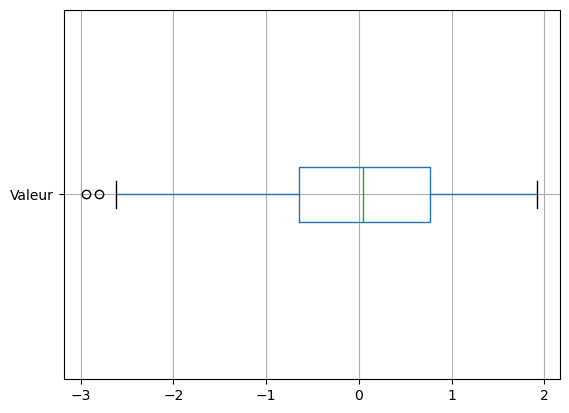

In [51]:
# 4. Détection des outliers
Sta_pol[['Valeur']].boxplot(vert=False)

In [52]:
# 5. Affichage des outliers
Sta_pol_out = Sta_pol.loc[Sta_pol["Valeur"] < -2.5]
Sta_pol_out

,Zone,Valeur
0,Afghanistan,-2.80
145,République arabe syrienne,-2.62
194,Yémen,-2.94


In [53]:
# 4.Changement des noms des colonnes
Sta_pol = Sta_pol.rename(columns={'Zone':'Pays',
                          'Valeur':'Stabilité_pol'})
Sta_pol['Pays'] = Sta_pol['Pays'].replace('Chine - RAS de Hong-Kong', 'Chine, RAS de Hong-Kong')
Sta_pol['Pays'] = Sta_pol['Pays'].replace('Chine - RAS de Macao', 'Chine, RAS de Macao')
new_row = {'Pays': 'Chine, continentale', 'Stabilité_pol': 0}
Sta_pol=Sta_pol.append(new_row, ignore_index=True)
Sta_pol

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\1294015388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sta_pol=Sta_pol.append(new_row, ignore_index=True)


,Pays,Stabilité_pol
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15
196,Zimbabwe,-0.71


In [54]:
Sta_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pays           198 non-null    object 
 1   Stabilité_pol  198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


# 2.6. Taux total d'impôts et de cotisations
#### [Retour](#Sommaire:)

In [55]:
TTCR = pd.read_csv('data//Total tax and contribution rate (% of profit).csv', delimiter=';', encoding='latin1')
TTCR = TTCR[['Country Name','2017']]
TTCR = TTCR.rename(columns={'Country Name':'Pays','2017':'TTCR'})
TTCR['TTCR'].astype(float)
# dimension de fichier
print(TTCR.shape)
# information de base sur le fichier de données
print('Infos de base:\n',TTCR.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',TTCR.isnull().sum())
# traitements des doublons
print('Doublons:\n',TTCR.duplicated().sum())
#types des données
print('Type des données:\n',TTCR.dtypes)
TTCR.info()

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   TTCR    236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     0
TTCR    30
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
TTCR    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   TTCR    236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


# 2.7. Investissements étrangers directs
#### [Retour](#Sommaire:)

In [56]:
IED = pd.read_csv('data//Investissements étrangers directs.csv', delimiter=';', encoding='latin1')
IED = IED[['Country Name','2017']]
IED = IED.rename(columns={'Country Name':'Pays','2017':'IED'})
IED['IED'].astype(float)
# dimension de fichier
print(IED.shape)
# information de base sur le fichier de données
print('Infos de base:\n',IED.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',IED.isnull().sum())
# traitements des doublons
print('Doublons:\n',IED.duplicated().sum())
#types des données
print('Type des données:\n',IED.dtypes)

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    264 non-null    object 
 1   IED     247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     2
IED     19
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
IED     float64
dtype: object


# 2.8. Dépenses liées au tourisme international
#### [Retour](#Sommaire:)

In [57]:
ITE = pd.read_csv('data//International tourism, expenditures (% of total imports).csv', delimiter=';', encoding='latin1')
ITE = ITE[['Country Name','2017']]
ITE = ITE.rename(columns={'Country Name':'Pays','2017':'ITE'})
ITE['ITE'].astype(float)
# dimension de fichier
print(ITE.shape)
# information de base sur le fichier de données
print('Infos de base:\n',ITE.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',ITE.isnull().sum())
# traitements des doublons
print('Doublons:\n',ITE.duplicated().sum())
#types des données
print('Type des données:\n',ITE.dtypes)

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   ITE     204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     0
ITE     62
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
ITE     float64
dtype: object


# 2.9 Inflation, prix à la consommation
#### [Retour](#Sommaire:)

In [58]:
ICP = pd.read_csv('data//Inflation, consumer prices (annual %).csv', delimiter=';', encoding='latin1')
ICP = ICP[['Country Name','2017']]
ICP = ICP.rename(columns={'Country Name':'Pays','2017':'ICP'})
ICP['ICP'].astype(float)
# dimension de fichier
print(ICP.shape)
# information de base sur le fichier de données
print('Infos de base:\n',ICP.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',ICP.isnull().sum())
# traitements des doublons
print('Doublons:\n',ICP.duplicated().sum())
#types des données
print('Type des données:\n',ICP.dtypes)

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   ICP     229 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     0
ICP     37
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
ICP     float64
dtype: object


# 2.10. Formation brute de capital fixe
#### [Retour](#Sommaire:)

In [59]:
GCF = pd.read_csv('data//Gross capital formation (% of GDP).csv', delimiter=';', encoding='latin1')
GCF = GCF[['Country Name','2017']]
GCF = GCF.rename(columns={'Country Name':'Pays','2017':'GCF'})
GCF['GCF'].astype(float)
# dimension de fichier
print(GCF.shape)
# information de base sur le fichier de données
print('Infos de base:\n',GCF.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',GCF.isnull().sum())
# traitements des doublons
print('Doublons:\n',GCF.duplicated().sum())
#types des données
print('Type des données:\n',GCF.dtypes)

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   GCF     225 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     0
GCF     41
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
GCF     float64
dtype: object


# 2.11. Indice de profondeur de l'information sur le crédit
#### [Retour](#Sommaire:)

In [60]:
DCII = pd.read_csv('data//Depth of credit information index.csv', delimiter=';', encoding='latin1')
DCII = DCII[['Country Name','2017']]
DCII = DCII.rename(columns={'Country Name':'Pays','2017':'DCII'})
DCII['DCII'].astype(float)
# dimension de fichier
print(DCII.shape)
# information de base sur le fichier de données
print('Infos de base:\n',DCII.info())
# traitement des valeurs nulles
print('Valeurs nulles:\n',DCII.isnull().sum())
# traitements des doublons
print('Doublons:\n',DCII.duplicated().sum())
#types des données
print('Type des données:\n',DCII.dtypes)

(266, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pays    266 non-null    object 
 1   DCII    237 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
Infos de base:
 None
Valeurs nulles:
 Pays     0
DCII    29
dtype: int64
Doublons:
 0
Type des données:
 Pays     object
DCII    float64
dtype: object


# 3. Jointures
#### [Retour](#Sommaire:)

In [61]:
dispopulation = pd.merge(df_dispo_alimentaire,pop_tot,on= 'Pays',how='inner')
dispopulation

,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population
0,Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0,50.877193,33.931347,36296.113
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,24.268178,16.062776,57009.756
2,Albanie,47.0,0.0,38.0,47.0,NaN,13.0,4.0,80.851064,-4.938335,2884.169
3,Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.722022,21.138007,41389.189
4,Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0,48.418631,1.698592,82658.409
...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,412.0,94.0,433.0,412.0,NaN,48.0,-26.0,105.097087,53.792384,9487.203
168,Équateur,341.0,0.0,0.0,324.0,17.0,340.0,-1.0,0.000000,17.408415,16785.361
169,États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,NaN,21914.0,80.0,0.673382,8.142262,325084.756
170,Éthiopie,14.0,NaN,1.0,14.0,1.0,14.0,0.0,7.142857,31.888173,106399.924


In [62]:
PIB_dispopulation = pd.merge(PIB,dispopulation,on='Pays',how='inner')
PIB_dispopulation

,Pays,PIB_Habitant,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population
0,Afghanistan,0.014344,57.0,NaN,29.0,55.0,2.0,28.0,0.0,50.877193,33.931347,36296.113
1,Afrique du Sud,0.107383,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,24.268178,16.062776,57009.756
2,Albanie,1.565167,47.0,0.0,38.0,47.0,NaN,13.0,4.0,80.851064,-4.938335,2884.169
3,Algérie,0.099294,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.722022,21.138007,41389.189
4,Allemagne,0.540197,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0,48.418631,1.698592,82658.409
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Viet Nam,0.025005,1206.0,1.0,291.0,1166.0,39.0,918.0,2.0,24.129353,10.748187,94600.648
168,Yémen,0.026768,246.0,0.0,78.0,237.0,8.0,168.0,0.0,31.707317,30.787264,27834.819
169,Zambie,0.091071,60.0,1.0,12.0,58.0,2.0,49.0,0.0,20.000000,34.796894,16853.599
170,Zimbabwe,0.108747,76.0,NaN,6.0,67.0,3.0,69.0,0.0,7.894737,16.160947,14236.595


In [63]:
PIB_dispopulation_stapol = pd.merge(PIB_dispopulation,Sta_pol,on='Pays',how='inner')
PIB_dispopulation_stapol

,Pays,PIB_Habitant,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population,Stabilité_pol
0,Afghanistan,0.014344,57.0,NaN,29.0,55.0,2.0,28.0,0.0,50.877193,33.931347,36296.113,-2.80
1,Afrique du Sud,0.107383,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,24.268178,16.062776,57009.756,-0.28
2,Albanie,1.565167,47.0,0.0,38.0,47.0,NaN,13.0,4.0,80.851064,-4.938335,2884.169,0.38
3,Algérie,0.099294,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.722022,21.138007,41389.189,-0.92
4,Allemagne,0.540197,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0,48.418631,1.698592,82658.409,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Viet Nam,0.025005,1206.0,1.0,291.0,1166.0,39.0,918.0,2.0,24.129353,10.748187,94600.648,0.23
166,Yémen,0.026768,246.0,0.0,78.0,237.0,8.0,168.0,0.0,31.707317,30.787264,27834.819,-2.94
167,Zambie,0.091071,60.0,1.0,12.0,58.0,2.0,49.0,0.0,20.000000,34.796894,16853.599,0.15
168,Zimbabwe,0.108747,76.0,NaN,6.0,67.0,3.0,69.0,0.0,7.894737,16.160947,14236.595,-0.71


In [64]:
Full_Data = pd.merge(PIB_dispopulation_stapol,pays_revenu,on='Pays',how='inner')
Full_Data.head()

,Pays,PIB_Habitant,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population,Stabilité_pol,Groupe_revenu
0,Afghanistan,0.014344,57.0,NaN,29.0,55.0,2.0,28.0,0.0,50.877193,33.931347,36296.113,-2.80,Faible revenu
1,Afrique du Sud,0.107383,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,24.268178,16.062776,57009.756,-0.28,"Revenu intermédiaire, tranche supérieure"
2,Albanie,1.565167,47.0,0.0,38.0,47.0,NaN,13.0,4.0,80.851064,-4.938335,2884.169,0.38,"Revenu intermédiaire, tranche supérieure"
3,Algérie,0.099294,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.722022,21.138007,41389.189,-0.92,"Revenu intermédiaire, tranche inférieure"
4,Allemagne,0.540197,1739.0,646.0,842.0,1609.0,NaN,1514.0,-29.0,48.418631,1.698592,82658.409,0.59,Revenu élevé


In [65]:
Full_Data = pd.merge(Full_Data,DCII,on='Pays',how='left')
Full_Data = pd.merge(Full_Data,GCF,on='Pays',how='left')
Full_Data = pd.merge(Full_Data,ICP,on='Pays',how='left')
Full_Data = pd.merge(Full_Data,ITE,on='Pays',how='left')
Full_Data = pd.merge(Full_Data,IED,on='Pays',how='left')
Full_Data = pd.merge(Full_Data,TTCR,on='Pays',how='left')
Full_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pays                      153 non-null    object 
 1   PIB_Habitant              152 non-null    float64
 2   Disponibilité intérieure  151 non-null    float64
 3   Exportations - Quantité   119 non-null    float64
 4   Importations - Quantité   151 non-null    float64
 5   Nourriture                151 non-null    float64
 6   Pertes                    60 non-null     float64
 7   Production                149 non-null    float64
 8   Variation de stock        150 non-null    float64
 9   TDI                       151 non-null    float64
 10  % Popu 2007_2017          152 non-null    float64
 11  Population                153 non-null    float64
 12  Stabilité_pol             153 non-null    float64
 13  Groupe_revenu             152 non-null    object 
 14  DCII      

In [66]:
corr = Full_Data.corr()
corr

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\1281157727.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Full_Data.corr()


,PIB_Habitant,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population,Stabilité_pol,DCII,GCF,ICP,ITE,IED,TTCR
PIB_Habitant,1.000000,-0.095875,-0.070274,-0.115831,-0.093859,-0.072024,-0.091309,-0.047096,0.194793,-0.080463,-0.079622,0.337716,-0.228368,-0.028383,-0.111981,-0.146430,-0.101927,-0.244413
Disponibilité intérieure,-0.095875,1.000000,0.488695,0.315874,0.998007,0.782061,0.981849,0.024308,-0.198037,-0.118503,0.758707,-0.079613,0.164139,0.011283,-0.034317,0.071912,0.324103,0.111039
Exportations - Quantité,-0.070274,0.488695,1.000000,0.159218,0.505077,0.162122,0.628995,0.009642,0.061749,-0.130934,0.146453,-0.010306,0.153767,-0.031162,-0.033751,0.135058,0.420918,0.276569
Importations - Quantité,-0.115831,0.315874,0.159218,1.000000,0.318874,0.221104,0.239093,0.321392,0.250605,-0.067012,0.150672,0.081566,0.026819,-0.157903,0.078297,0.338882,0.377366,0.170988
Nourriture,-0.093859,0.998007,0.505077,0.318874,1.000000,0.748097,0.983056,0.027871,-0.189956,-0.117657,0.739727,-0.077305,0.162583,0.008657,-0.030432,0.075701,0.320462,0.103308
Pertes,-0.072024,0.782061,0.162122,0.221104,0.748097,1.000000,0.774349,-0.119311,-0.205701,-0.253329,0.922628,0.050076,0.233375,0.032211,-0.246659,0.018428,0.595696,-0.118384
Production,-0.091309,0.981849,0.628995,0.239093,0.983056,0.774349,1.000000,0.034170,-0.199651,-0.134985,0.704643,-0.073078,0.192349,0.079815,-0.075734,0.023421,0.333121,0.123838
Variation de stock,-0.047096,0.024308,0.009642,0.321392,0.027871,-0.119311,0.034170,1.000000,-0.079013,-0.185241,-0.093304,0.139753,0.209045,-0.023465,-0.088898,0.034308,-0.029884,0.302631
TDI,0.194793,-0.198037,0.061749,0.250605,-0.189956,-0.205701,-0.199651,-0.079013,1.000000,0.076244,-0.181823,0.296183,-0.295704,0.226656,-0.013960,0.237861,0.010087,-0.473462
% Popu 2007_2017,-0.080463,-0.118503,-0.130934,-0.067012,-0.117657,-0.253329,-0.134985,-0.185241,0.076244,1.000000,-0.047552,-0.338844,-0.285204,0.231265,0.064509,-0.009751,-0.148171,0.011570


In [67]:
# Créer un masque pour la partie supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

In [68]:
# Créer une heatmap avec seaborn
plt.figure(figsize=(15, 12))  # Définir la taille de la figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar=True, square=True)
plt.show()

TypeError: 'module' object is not callable

In [ ]:
#creation d'un fichier csv du dataframe final
data = 'donnees.csv'
Full_Data.to_csv(data, index=False)  # on utilise index=False pour exclure les indices de ligne

In [ ]:
check = pd.read_csv('donnees.csv')
check.head()

In [69]:
Full_Data[Full_Data['Pays']=='Chine, continentale']

,Pays,PIB_Habitant,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,TDI,% Popu 2007_2017,Population,Stabilité_pol,Groupe_revenu,DCII,GCF,ICP,ITE,IED,TTCR
30,"Chine, continentale",0.006096,18161.0,576.0,452.0,17518.0,643.0,18236.0,-50.0,2.48885,5.574164,1421021.791,0.0,"Revenu intermédiaire, tranche supérieure",NaN,NaN,NaN,NaN,NaN,NaN


# [Clusterings & visualisations](OUABEL_Rabah_2_clustering_visualisations_082023-Copy1.ipynb)
[Retour](#Sommaire:)